In [16]:
from kaggle.api.kaggle_api_extended import KaggleApi

api = KaggleApi()
api.authenticate()

In [24]:
files = api.dataset_download_files('sudalairajkumar/cryptocurrencypricehistory')

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns

In [93]:
data = pd.DataFrame()

for _ in glob.glob('./cryptocurrencypricehistory/*.csv'):
    data = pd.concat([data, pd.read_csv(_)])

In [94]:
data.groupby("Name").max()

,SNo,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
Name,,,,,,,,,
Aave,146,AAVE,2021-02-27 23:59:59,559.122944,504.781660,529.829717,529.896175,2.838573e+09,6.558683e+09
Binance Coin,1313,BNB,2021-02-27 23:59:59,342.879593,250.540810,332.918442,332.616033,1.798295e+10,5.140008e+10
Bitcoin,2862,BTC,2021-02-27 23:59:59,58330.572142,55672.609513,57532.738864,57539.943668,3.509679e+11,1.072263e+12
Cardano,1245,ADA,2021-02-27 23:59:59,1.476653,1.234138,1.242145,1.324860,1.914198e+10,4.121970e+10
Chainlink,1256,LINK,2021-02-27 23:59:59,36.828460,33.427989,34.711280,34.715210,1.705493e+11,1.412942e+10
Cosmos,716,ATOM,2021-02-27 23:59:59,26.419385,22.836658,25.171024,25.186711,3.365948e+09,5.301411e+09
Crypto.com Coin,806,CRO,2021-02-27 23:59:59,0.270960,0.177083,0.217134,0.220261,1.993686e+09,5.317940e+09
Dogecoin,2631,DOGE,2021-02-27 23:59:59,0.084945,0.068525,0.078773,0.078825,2.540331e+10,1.011246e+10
EOS,1337,EOS,2021-02-27 23:59:59,22.890400,18.877399,21.639099,21.542601,1.001470e+10,1.776945e+10


In [95]:
data.dtypes

SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object

In [96]:
#Converting date column to datetime data type
data.Date = pd.to_datetime(data.Date)

In [97]:
data.Date = data.Date.apply(lambda x: x.date())

In [98]:
data = data[data.Date > pd.to_datetime("2019-12-31")].reset_index().drop(["index", "SNo"], axis = 1)

In [99]:
data.head()

,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,NEM,XEM,2020-01-01,0.033047,0.031893,0.032147,0.032648,5.041453e+06,2.938314e+08
1,NEM,XEM,2020-01-02,0.033163,0.031370,0.032690,0.031912,5.253256e+06,2.872094e+08
2,NEM,XEM,2020-01-03,0.032618,0.031297,0.032019,0.032123,5.138719e+06,2.891040e+08
3,NEM,XEM,2020-01-04,0.032933,0.031690,0.032123,0.032090,8.757789e+06,2.888092e+08
4,NEM,XEM,2020-01-05,0.033270,0.031906,0.032064,0.032363,4.489886e+06,2.912630e+08


In [100]:
data.isnull().sum()

Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

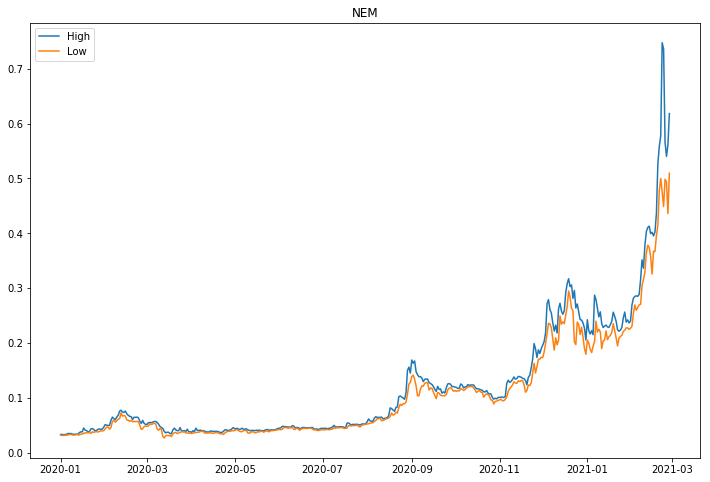

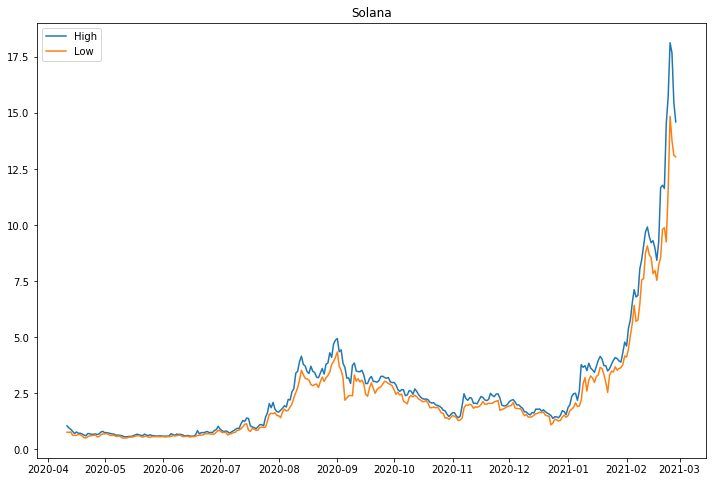

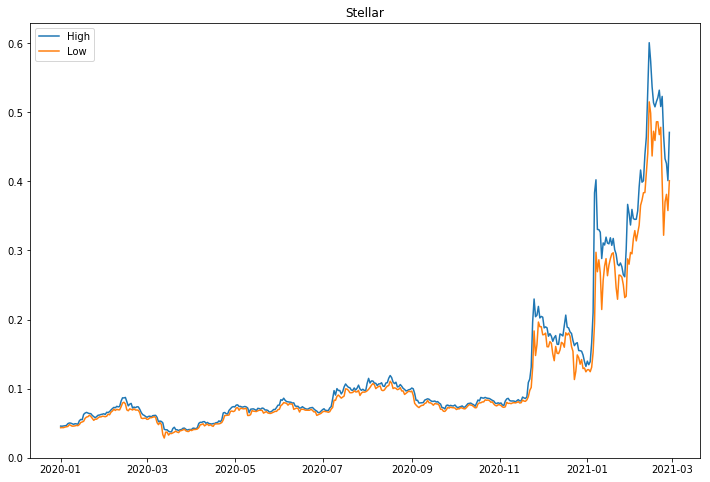

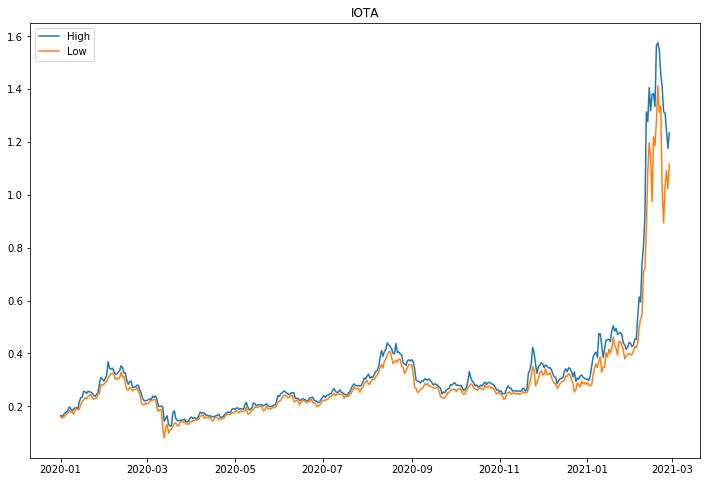

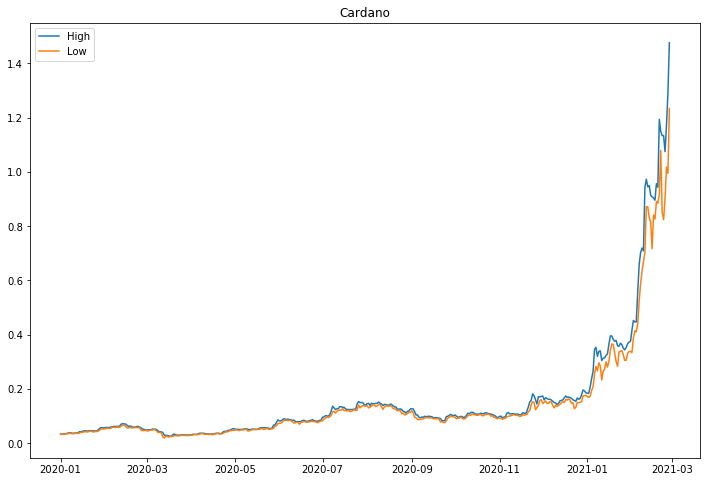

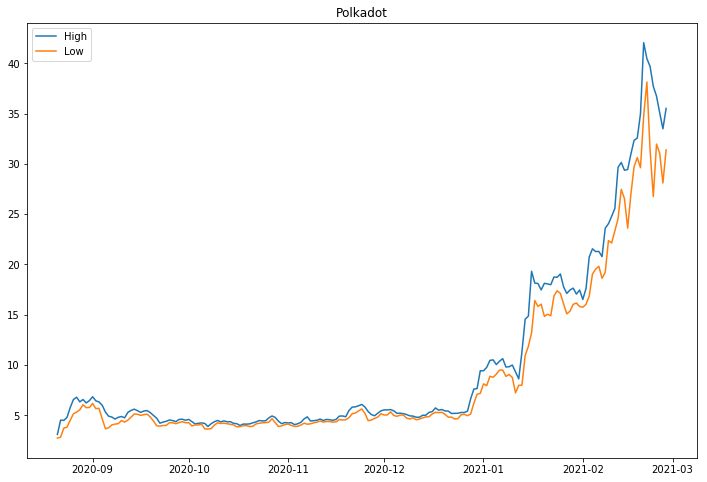

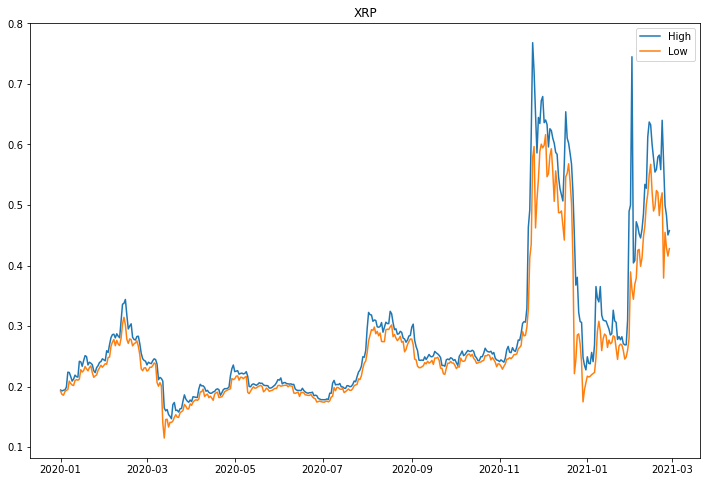

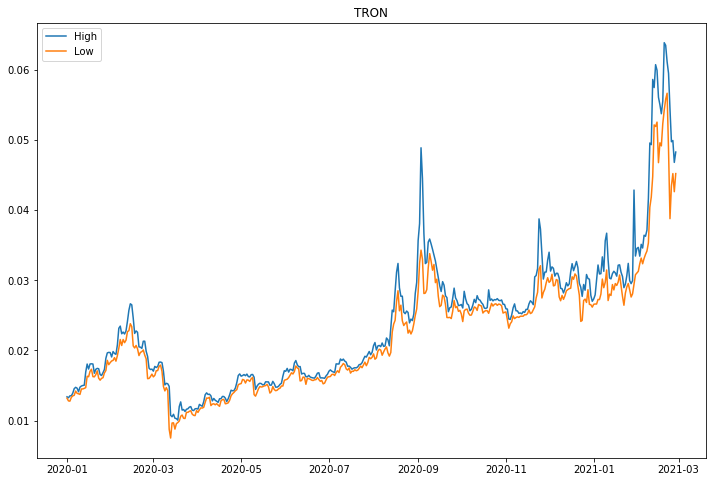

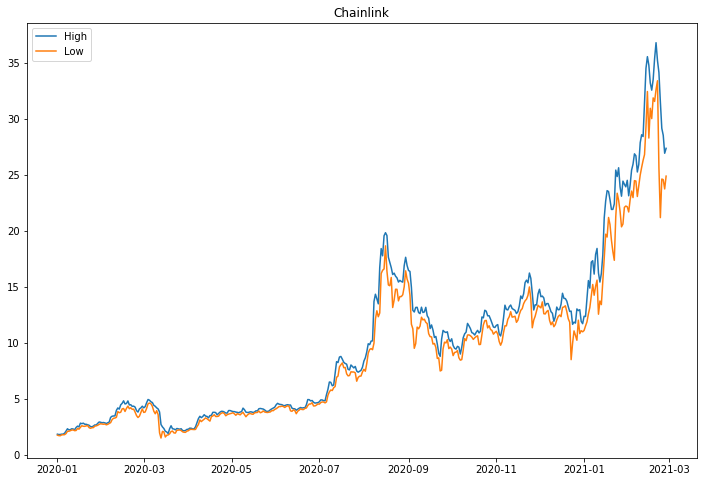

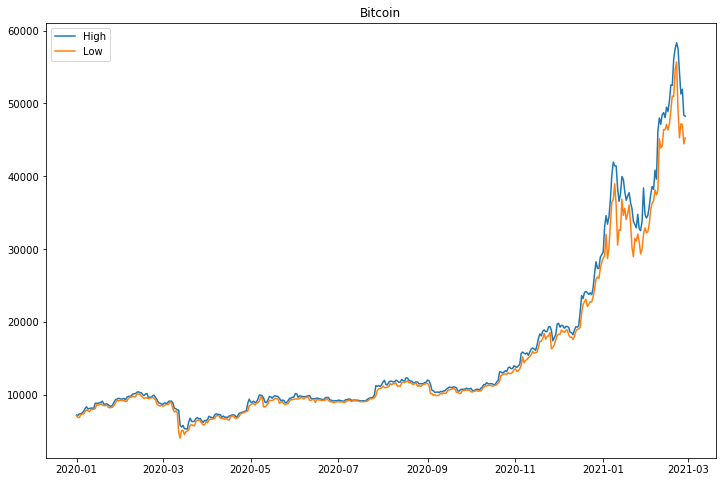

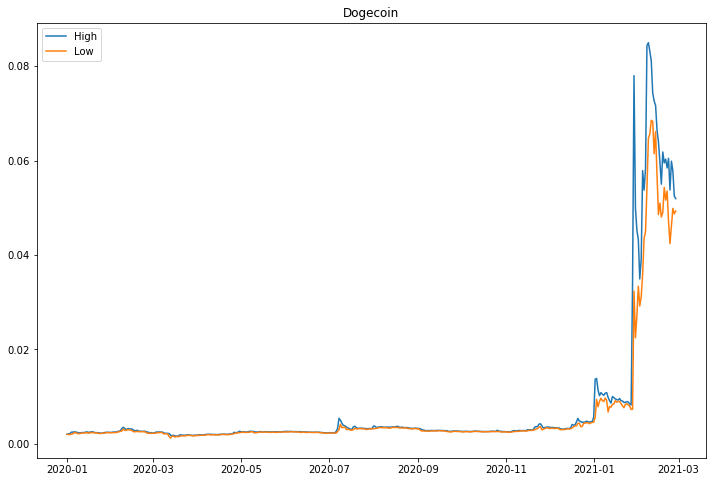

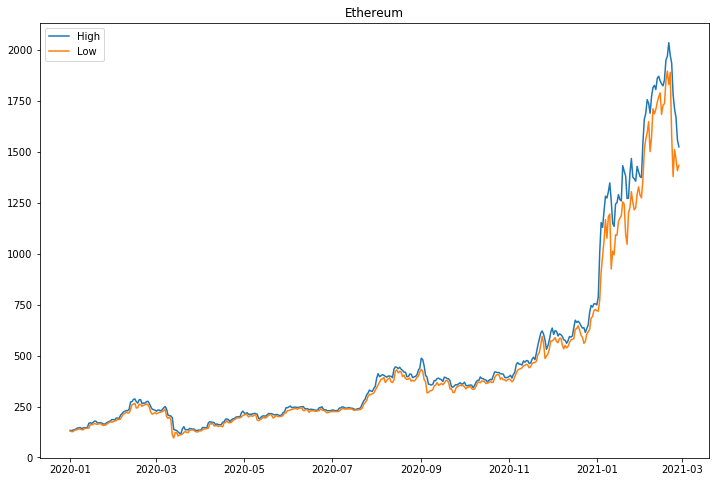

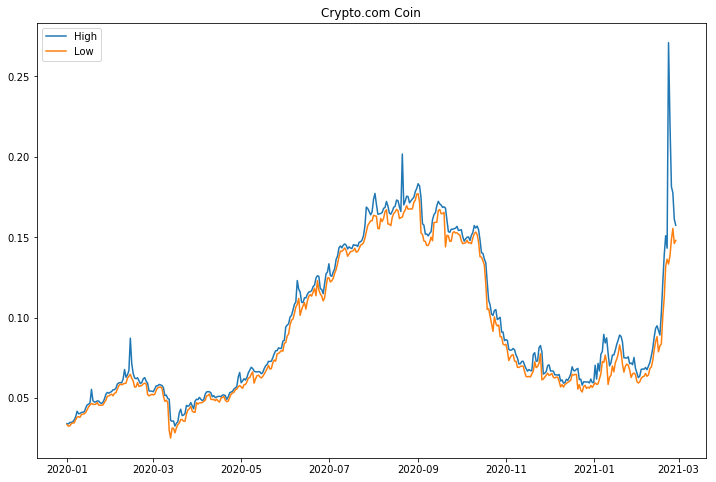

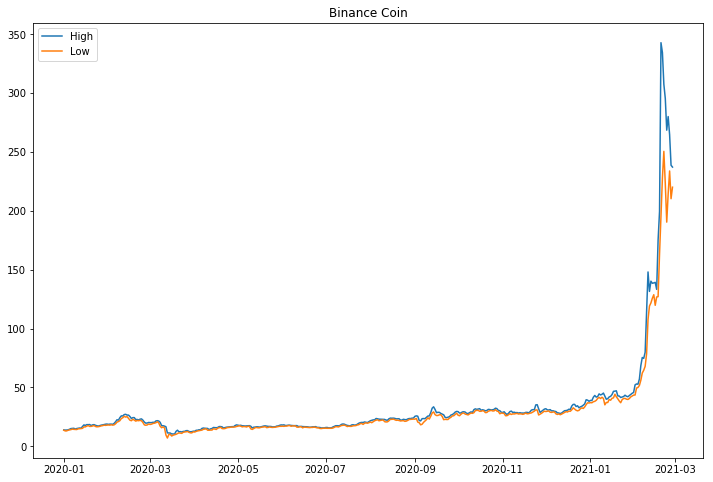

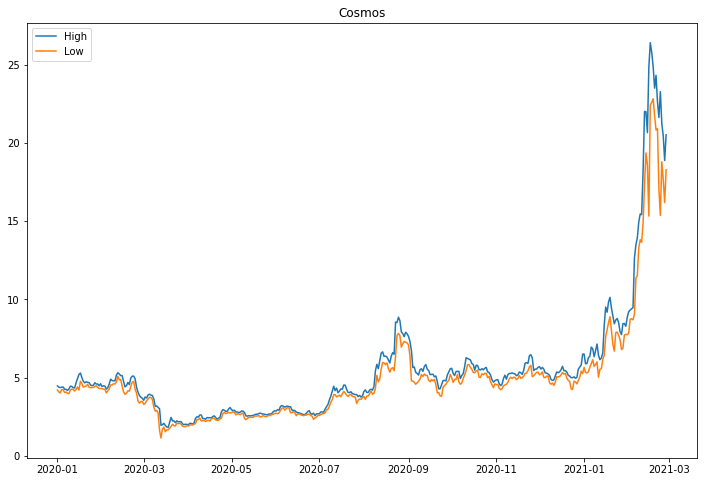

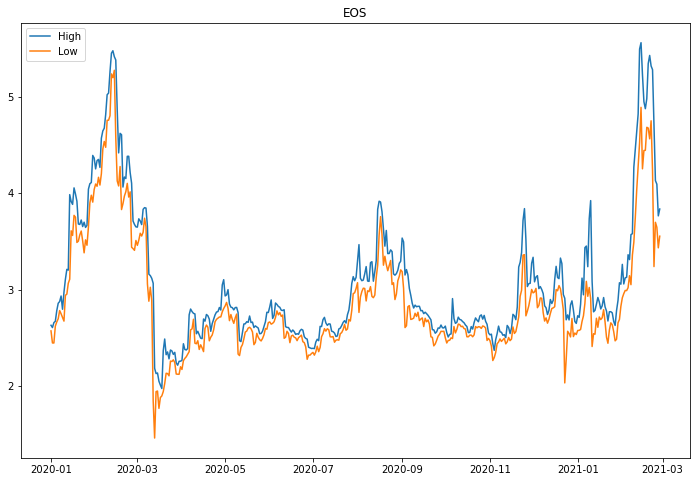

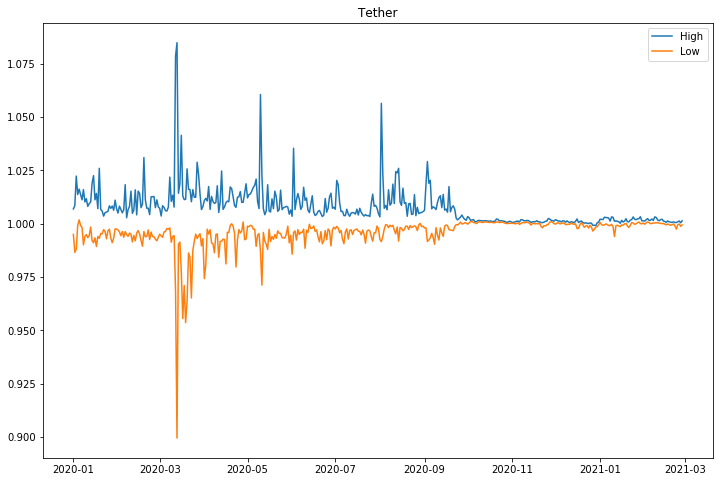

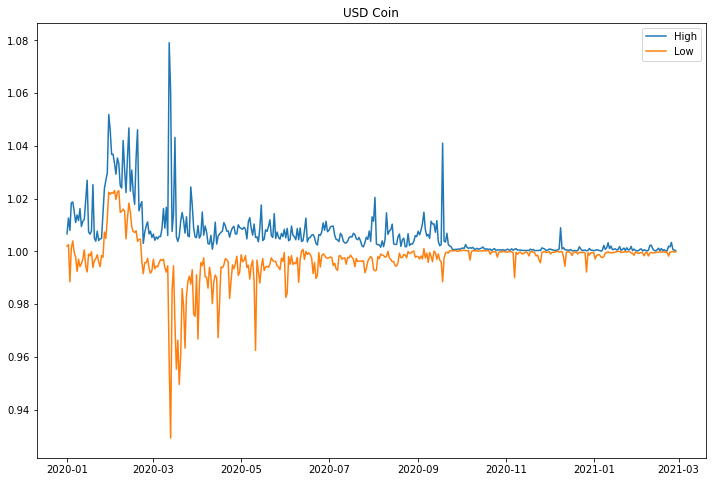

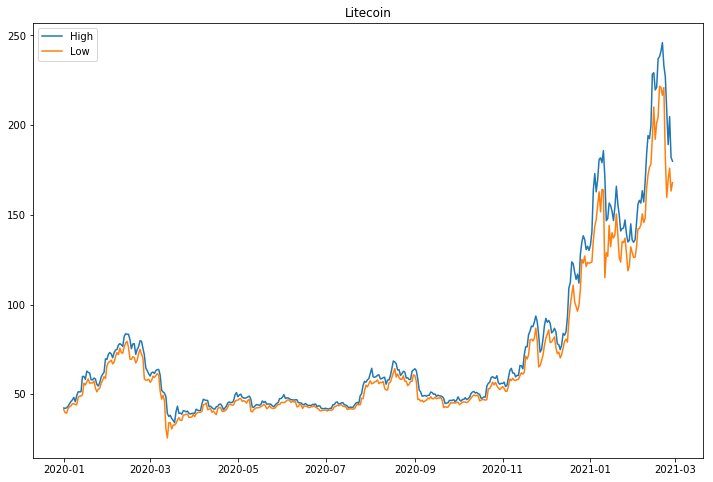

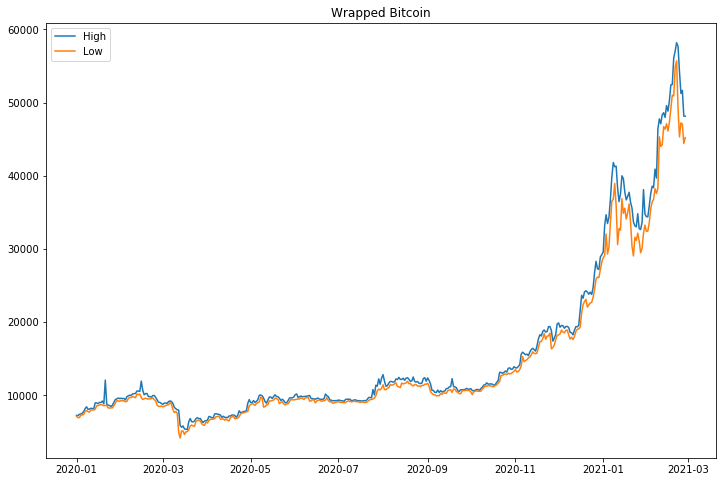

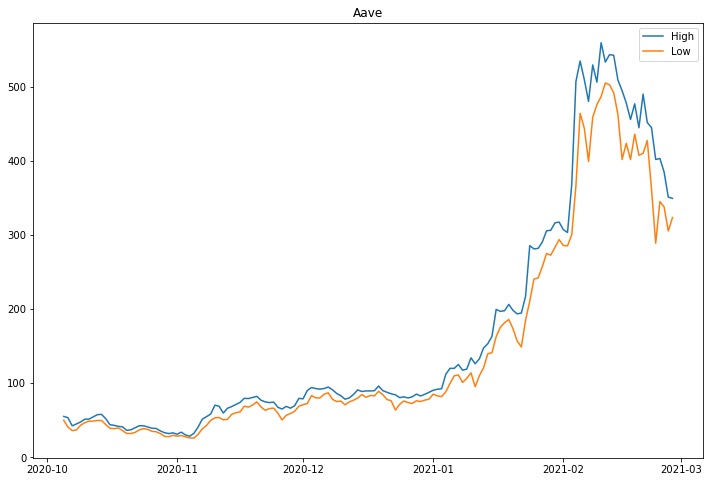

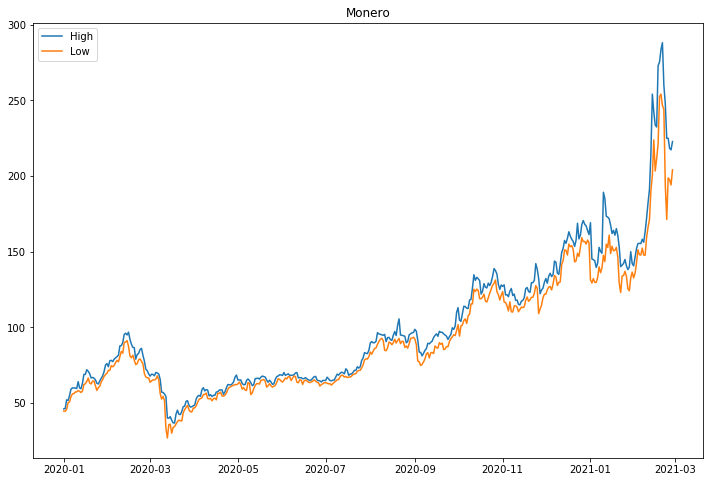

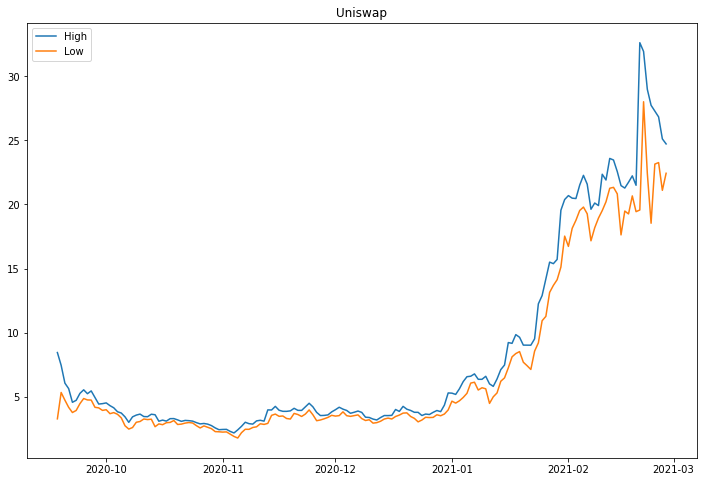

In [113]:
for _ in data.Name.unique():
    crypto = data[data.Name == _]
    plt.figure(figsize = (12, 8))
    plt.title(_)
    plt.plot(crypto.Date, crypto.High, label = "High")
    plt.plot(crypto.Date, crypto.Low, label = "Low")
    plt.legend()
    plt.show()

In [180]:
names = data.Name.unique()
corr = pd.DataFrame(np.zeros((len(names), len(names)), dtype = "int64"), columns = names, index = names)

In [185]:
#Finding correlation between market caps of different cryptos
for c1 in names:
    for c2 in names:
        mc1 = data[data.Name == c1].Marketcap
        mc2 = data[data.Name == c2].Marketcap
        if len(mc1) >= len(mc2):
            val = np.corrcoef(mc1[len(mc1) - len(mc2):], mc2)[0][1]
            corr.loc[c1, c2] = val
            corr.loc[c2, c1] = val
        elif len(mc1) < len(mc2):
            val = np.corrcoef(mc2[len(mc2) - len(mc1):], mc1)[0][1]
            corr.loc[c1, c2] = val
            corr.loc[c2, c1] = val

In [188]:
corr

,NEM,Solana,Stellar,IOTA,Cardano,Polkadot,XRP,TRON,Chainlink,Bitcoin,...,Binance Coin,Cosmos,EOS,Tether,USD Coin,Litecoin,Wrapped Bitcoin,Aave,Monero,Uniswap
NEM,1.000000,0.847009,0.901845,0.840448,0.895239,0.888211,0.750868,0.900465,0.892240,0.926167,...,0.833712,0.870132,0.348617,0.922387,0.936312,0.890083,0.940451,0.782690,0.927497,0.857557
Solana,0.847009,1.000000,0.884884,0.909137,0.969233,0.949268,0.485760,0.755516,0.818308,0.855886,...,0.921931,0.911124,0.729235,0.789401,0.844915,0.814366,0.813210,0.870685,0.741080,0.941184
Stellar,0.901845,0.884884,1.000000,0.884433,0.933665,0.922620,0.693561,0.836804,0.912084,0.964318,...,0.797318,0.896615,0.420683,0.868103,0.909400,0.942667,0.932131,0.921372,0.864483,0.912556
IOTA,0.840448,0.909137,0.884433,1.000000,0.945326,0.908690,0.623869,0.844513,0.835478,0.835251,...,0.925964,0.971661,0.595620,0.733576,0.782083,0.832600,0.792199,0.832606,0.807212,0.879125
Cardano,0.895239,0.969233,0.933665,0.945326,1.000000,0.963065,0.592475,0.814476,0.859084,0.905320,...,0.924639,0.943327,0.431402,0.816995,0.877189,0.869287,0.872283,0.888474,0.814954,0.945264
Polkadot,0.888211,0.949268,0.922620,0.908690,0.963065,1.000000,0.401251,0.863579,0.935274,0.913835,...,0.886751,0.916980,0.752632,0.937703,0.954310,0.875576,0.903865,0.915563,0.837993,0.966188
XRP,0.750868,0.485760,0.693561,0.623869,0.592475,0.401251,1.000000,0.755311,0.695198,0.641690,...,0.522436,0.631042,0.446211,0.682485,0.645561,0.640837,0.680679,0.388483,0.747830,0.399069
TRON,0.900465,0.755516,0.836804,0.844513,0.814476,0.863579,0.755311,1.000000,0.920385,0.840056,...,0.746555,0.878714,0.450061,0.894168,0.877390,0.812084,0.863196,0.845950,0.922088,0.867609
Chainlink,0.892240,0.818308,0.912084,0.835478,0.859084,0.935274,0.695198,0.920385,1.000000,0.909950,...,0.730653,0.885163,0.317232,0.929239,0.936579,0.861709,0.916881,0.952158,0.908022,0.945079
Bitcoin,0.926167,0.855886,0.964318,0.835251,0.905320,0.913835,0.641690,0.840056,0.909950,1.000000,...,0.783324,0.863690,0.362805,0.911241,0.945927,0.976681,0.980220,0.878086,0.907907,0.884450


In [200]:
#Getting instant correlation
print("Available cryptos: ")
print(data.Name.unique())
first = input("\nEnter the first crypto: ")
second = input("Enter the second crypto: ")

try:
    result = corr.loc[first, second]
    print(f"\nThe correlation between {first} and {second} is : {result}")
except:
    print(e)
    print("\nvalid crypto name")

Available cryptos: 
['NEM' 'Solana' 'Stellar' 'IOTA' 'Cardano' 'Polkadot' 'XRP' 'TRON'
 'Chainlink' 'Bitcoin' 'Dogecoin' 'Ethereum' 'Crypto.com Coin'
 'Binance Coin' 'Cosmos' 'EOS' 'Tether' 'USD Coin' 'Litecoin'
 'Wrapped Bitcoin' 'Aave' 'Monero' 'Uniswap']

Enter the first crypto: Litecoin
Enter the second crypto: TRON

The correlation between Litecoin and TRON is : 0.8120839783102344
